In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data Cleaning

In [55]:
# cek missing value
print("\nCek Missing Value:")
print(df.isnull().sum())

# cek data duplikat
duplicate_count = df.duplicated().sum()
print(f"\nJumlah Data Duplikat: {duplicate_count}")

# hapus data duplikat jika ada
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Data setelah menghapus duplikat: {df.shape[0]} baris")


Cek Missing Value:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Jumlah Data Duplikat: 0


Terlihat di atas pada kolom "Sleep Disorder" memiliki 219 baris yang kosong.
Pada tahap ini dilakukan data cleaning sederhana, yaitu:
- Cek Missing Value, untuk memastikan tidak ada kolom kosong.
- Cek Duplikat, untuk menghitung data yang berulang.
- Jika ada data duplikat, dihapus agar hasil analisis tidak bias.

## Menentukan Variabel X dan Y

In [56]:
X = df[['Sleep Duration', 'Stress Level']]
y = df['Quality of Sleep']

- Variabel X berisi dua fitur: Sleep Duration dan Stress Level.
- Variabel Y adalah Quality of Sleep yang akan kita prediksi.

## Membagi Data (Train-Test Split)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data training : {len(X_train)}")
print(f"Jumlah data testing  : {len(X_test)}")

Jumlah data training : 299
Jumlah data testing  : 75


Data dibagi menjadi dua bagian:
- 80% untuk training (melatih model)
- 20% untuk testing (menguji akurasi model)

## Membuat dan Melatih Model Regresi Linear

In [60]:
# buat model regresi linear
model = LinearRegression()

# latih model menggunakan data training
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


membuat objek model dari kelas LinearRegression(), lalu melatihnya dengan fungsi fit() menggunakan data training (X_train, y_train).

Tahapan ini inti dari supervised learning, di mana model mempelajari hubungan antara variabel input (X) dan target (Y).

## Melakukan Prediksi

In [61]:
# prediksi nilai Y (Quality of Sleep)
y_pred = model.predict(X_test)

# hasil prediksi pertama
print("Contoh hasil prediksi:", y_pred[:5])

Contoh hasil prediksi: [9.11150924 5.68788141 5.61772183 9.11150924 5.61772183]


Setelah model dilatih, kita gunakan untuk memprediksi nilai Quality of Sleep pada data yang belum pernah dilihat sebelumnya (X_test). 

Hasil prediksi disimpan dalam variabel y_pred.

## Evaluasi Model

In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Hasil Evaluasi Model ===")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


=== Hasil Evaluasi Model ===
MAE  : 0.3506
MSE  : 0.2002
RMSE : 0.4474
R²   : 0.8673


Mengevaluasi performa model menggunakan empat metrik:
- MAE (Mean Absolute Error) -> rata-rata selisih antara prediksi dan nilai sebenarnya.
- MSE (Mean Squared Error) -> rata-rata kuadrat dari error.
- RMSE (Root Mean Squared Error) -> akar dari MSE, untuk mengembalikan satuan ke skala asli.
- R² (R-squared) -> menunjukkan seberapa besar variasi data yang bisa dijelaskan oleh model (semakin mendekati 1 semakin baik).

## Visualisasi Hasil Prediksi

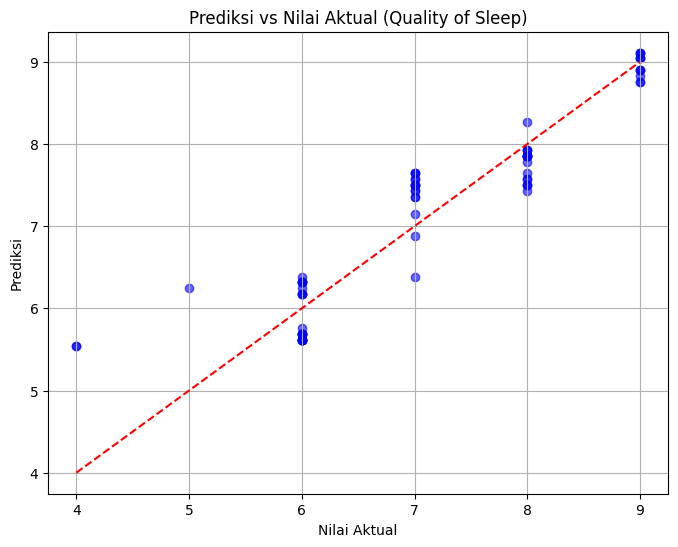

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Prediksi vs Nilai Aktual (Quality of Sleep)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.grid(True)
plt.show()

menampilkan hubungan antara nilai aktual (y_test) dan nilai prediksi (y_pred).
- Garis merah diagonal menunjukkan prediksi sempurna.
- Semakin dekat titik-titik ke garis tersebut, semakin akurat modelnya.
Ini membantu melihat apakah model regresi sudah bekerja dengan baik.